![image.png](attachment:image.png)

In [1]:
# Copyright (c) Thalesians Ltd, 2018-2019. All rights reserved
# Copyright (c) Paul Alexander Bilokon, 2018-2019. All rights reserved
# Author: Paul Alexander Bilokon <paul@thalesians.com>
# Version: 2.0 (2019.04.19)
# Previous versions: 1.0 (2018.08.03)
# Email: education@thalesians.com
# Platform: Tested on Windows 10 with Python 3.6

# Linear algebra

## Motivation

In data science, machine learning (ML), and artificial intelligence (AI), we usually deal not with single numbers but with *multivariate* (i.e. containing multiple elements or entries) lists of numbers &mdash; mathematically speaking, **vectors**, &mdash; and *multivariate* tables of numbers &mdash; mathematically speaking, **matrices**. Therefore we solve *multivariate* equations, apply *multivariate* calculus to find optima of *multivariate* functions, etc.

The branch of mathematics that studies vectors, matrices, and related mathematical objects is called **linear algebra**. It is one of the most practically useful areas of mathematics in applied work and a prerequisite for data science, machine learning (ML), and artificial intelligence (AI).

## Objectives

* To consider numbers as examples of mathematical objects.
* To introduce a different kind of mathematical object &mdash; vector &mdash; first in two dimensions.
* To introduce vector arithmetics: vector addition and multiplication by scalars.
* To introduce the vector norm and relate it to the length of a vector.
* To introduce the inner product and relate it to the angle between two vectors.
* To consider vectors in three dimensions.
* To show how vectors can be generalised to four- and higher-dimensional spaces.
* To consider vector spaces in general.
* To show that functions also form a vector space.
* To introduce linear combinations and examine the notions of linear (in)dependence, span, and basis.
* To introduce subspaces.

In [6]:
%matplotlib inline

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Numbers

In everyday life, we are used to doing arithmetics with numbers, such as

In [11]:
5 + 3

8

and

In [12]:
10 * 5

50

The numbers 5 and 3 are *mathematical objects*.

Indeed, when we think about mathematics, we probably think of **numbers** as the fundamental objects of study. Numbers used for counting, namely $1, 2, 3, 4, 5, \ldots$ (and so on) are called **natural numbers**. We say that they belong to the **set** (i.e. a collection of objects) of natural numbers, $\mathbb{N}$, and write $3 \in \mathbb{N}$ to indicate that, for example, 3 **belongs to** this set.

Not all numbers are quite as straightforward (quite as natural). For example, the number **zero** wasn't invented (discovered?) until much later than the natural numbers. We sometimes write $\{0\} \cup \mathbb{N}$ to denote the set containing precisely the natural numbers along with 0. That is, the set that is the **union** (denoted by $\cup$) of the set of natural numbers $\mathbb{N}$ and the **singleton** set (i.e. a set containing exactly one element) $\{0\}$. (In mathematics we often use curly brackets to define sets by enumerating their elements.)

Then, there are the negative numbers, $\ldots, -5, -4, -3, -2, -1$. These, together with 0 and the natural numbers are collectively referred to as **integers**, or are said to belong to the set of **integers**, denoted $\mathbb{Z}$.

Since every element of $\mathbb{N}$ is in $\mathbb{Z}$, we say that $\mathbb{N}$ is a **subset** of $\mathbb{Z}$, and write $\mathbb{N} \subseteq \mathbb{Z}$. Two sets $A$ and $B$ are said to be equal if $A \subseteq B$ and also $B \subseteq A$, in other words, if $A$ and $B$ contain exactly the same elements.

The negative number $-3$ is sometimes referred to as the **additive inverse** of $3$, because adding it to $3$ yields zero:

In [6]:
3 + (-3)

0

There are other, somewhat unnatural numbers, such as the **multiplicative inverse** of 3, $\frac{1}{3}$. When multiplied by its multiplicative inverse, a number yields not zero, but **one**, the **identity** or **unit**:

In [7]:
3 * (1 / 3)

1.0

The fractions, such as $\frac{1}{3}$, $\pi$, $e$, along with the integers, form a set of **real** numbers, $\mathbb{R}$. Clearly, both $\mathbb{N}$ and $\mathbb{Z}$ are subsets of $\mathbb{R}$.

Real numbers obey certain rules (in mathematics we say **axioms**) of arithmetics, e.g. multiplication is **distributive** over addition:

In [8]:
3 * (0.5 + 100) == 3 * 0.5 + 3 * 100

True

To find out more about these rules, read Harold Davenport's book *The Higher Arithmetic*: https://www.amazon.co.uk/Higher-Arithmetic-Introduction-Theory-Numbers/dp/0521722365

## Vectors in two dimensions

One can think of other kinds of mathematical objects. They may or may not be composed of numbers. In order to specify the location of a point on a two-dimensional plane you need a mathematical object composed of *two* different numbers: the $x$- and $y$-coordinates. Such a **point** may be given by a single mathematical object, $\mathbf{v} = \begin{pmatrix} 3 \\ 5 \end{pmatrix}$, where we understand that the first number specifies the $x$-coordinate, while the second the $y$-coordinate &mdash; the order of numbers in this pair matters.

We can visualise this mathematical object by means of a plot:

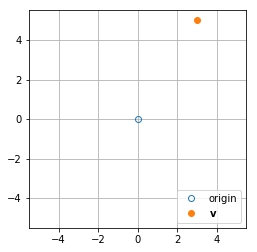

In [9]:
plt.plot(0, 0, 'o', markerfacecolor='none', label='origin')
plt.plot(3, 5, 'o', label='$\mathbf{v}$')
plt.axis([-5.5, 5.5, -5.5, 5.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.legend(loc='lower right');

It may be useful to think of this object, $\begin{pmatrix} 3 \\ 5 \end{pmatrix}$, which we shall call a **vector**, as *displacement* from the **origin**, $\begin{pmatrix} 0 \\ 0 \end{pmatrix}$. We can then read $\begin{pmatrix} 3 \\ 5 \end{pmatrix}$ as "go to the right (of the origin) by three units, and then go up (from the origin) by five units". Therefore vectors may be visualised as *arrows*, specifying a *direction*, as well as as *points*:

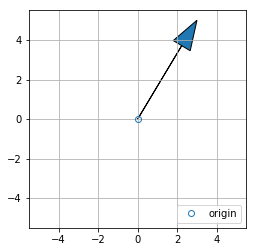

In [10]:
plt.plot(0, 0, 'o', markerfacecolor='none', label='origin')
plt.arrow(0, 0, 3, 5, shape='full', head_width=1, length_includes_head=True)
plt.axis([-5.5, 5.5, -5.5, 5.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.legend(loc='lower right');

Two-dimensional vectors are said to belong to a set called the **Euclidean 2-plane**, denoted $\mathbb{R}^2$. The set of real numbers, $\mathbb{R}$, is sometimes referred to as the **Euclidean real line**, and may also be written as $\mathbb{R}^1$ (although this is rarely done in practice).

## Two-dimensional vectors in data science

In data science, we often think of the $x$-coordinate as the **input** variable and the $y$-coordinate as the **output** variable. Consider, for example the "diabetes dataset" from Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression", Annals of Statistics (with discussion), 407-499: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In this dataset, "Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

Let us consider points (vectors) where the $x$-coordinate represents the body mass index (input) and the $y$-coordinate the aforementioned "quantitative measure of disease progression" (output) corresponding to the input.

In data science our goal is to find the relatinship between the output and the input. If such a relationship exists, we may be able to explain or predict the output by means of the input.

In [19]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_x = diabetes.data[:, 2]
diabetes_y = diabetes.target

One such input-output point is

In [20]:
(diabetes_x[0], diabetes_y[0])

(0.0616962065186885, 151.0)

another

In [22]:
(diabetes_x[1], diabetes_y[1])

(-0.0514740612388061, 75.0)

and so on. There are

In [23]:
len(diabetes_x)

442

such points in total, the last one being

In [24]:
(diabetes_x[len(diabetes_x)-1], diabetes_y[len(diabetes_x)-1])

(-0.0730303027164241, 57.0)

We can visualise these points by plotting them on an $xy$-plane, just as we visualised vectors as points before:

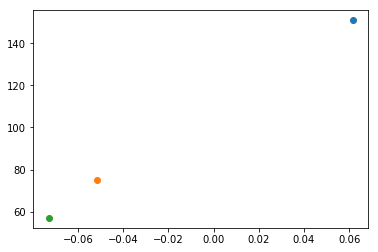

In [34]:
plt.plot(diabetes_x[0], diabetes_y[0], 'o')
plt.plot(diabetes_x[1], diabetes_y[1], 'o')
plt.plot(diabetes_x[len(diabetes_x)-1], diabetes_y[len(diabetes_x)-1], 'o');

To get a better idea of the relationship between the input and output, let us plot all available points, just as we plotted the three points above. The result is a **scatter plot**:

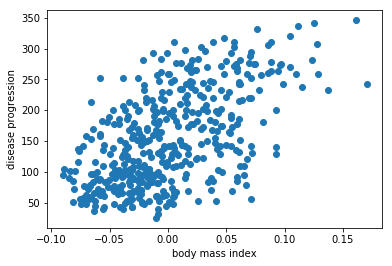

In [29]:
plt.plot(diabetes_x, diabetes_y, 'o')
plt.xlabel('body mass index')
plt.ylabel('disease progression');

The scatter plot shows that the points follow a certain pattern. In particular, the disease progression ($y$-coordinate, output) increases with the patient's body mass index ($x$-coordinate, input). Visualisation by means of the scatter plot has helped us spot this relationship.

## Vector arithmietics

Would it make sense to define **addition** for vectors? And if it would, how would we define it? Thinking of vectors as displacements gives us a clue: the sum of two vectors, $\mathbf{u}$ and $\mathbf{v}$, could be defined by "go in the direction specified by $\mathbf{u}$, then in the direction specified by $\mathbf{v}$".

If, for example, $\mathbf{u} = \begin{pmatrix} 5 \\ 3 \end{pmatrix}$ and $\mathbf{v} = \begin{pmatrix} 4 \\ 6 \end{pmatrix}$, then their sum would be obtained as follows:
* Start at the origin.
* Move in the direction specified by $\mathbf{u}$: "go to the right by five units, and then go up by three units".
* Then move in the direction specified by $\mathbf{v}$: "go to the right by four units, and then go up by six units".

The end result?

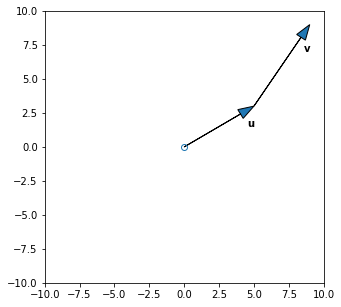

In [11]:
u = np.array([5, 3])
v = np.array([4, 6])
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(u[0], u[1], v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', u + v + (-.5, -2.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

Geometrically, we have appended the arrow representing the vector $\mathbf{v}$ to the end of the arrow representing the vector $\mathbf{u}$ drawn starting at the origin.

What if we started at the origin, went in the direction specified by $\mathbf{v}$ and then went in the direction specified by $\mathbf{u}$? Where would we end up?

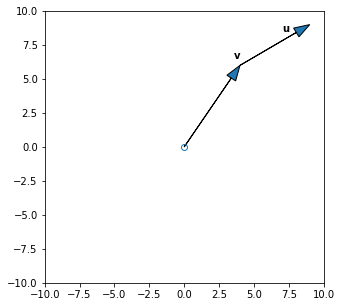

In [12]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .5))
plt.arrow(v[0], v[1], u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', v + u + (-2., -.5))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

We would end up in the same place. More generally, for any vectors $\mathbf{u}$ and $\mathbf{v}$, vector addition is **commutative**, in other words, $\mathbf{u} + \mathbf{v} = \mathbf{v} + \mathbf{u}$. Let us visualise this on a plot:

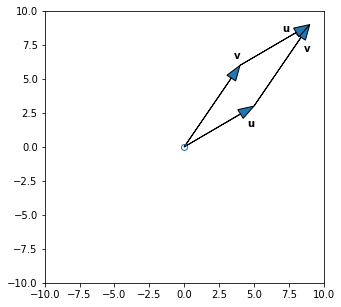

In [13]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(u[0], u[1], v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', u + v + (-.5, -2.))
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .5))
plt.arrow(v[0], v[1], u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', v + u + (-2., -.5))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

The sum $\mathbf{u} + \mathbf{v}$ (which, of course, is equal to $\mathbf{v} + \mathbf{u}$ since vector addition is commutative) is itself a vector, which is represented by the diagonal of the parallelogram formed by the arrows above:

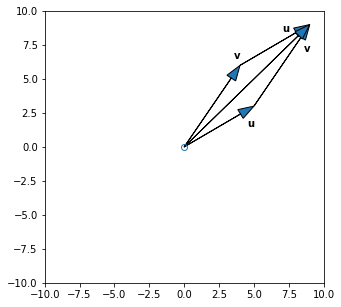

In [14]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(u[0], u[1], v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', u + v + (-.5, -2.))
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .5))
plt.arrow(v[0], v[1], u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', v + u + (-2., -.5))
plt.arrow(0, 0, u[0] + v[0], u[1] + v[1], head_width=.75, length_includes_head=True)
plt.xlim(-10, 10)
plt.ylim(-10, 10);

We observe that the sum of $\mathbf{u} = \begin{pmatrix} 5 \\ 3 \end{pmatrix}$ and $\mathbf{v} = \begin{pmatrix} 4 \\ 6 \end{pmatrix}$ is given by adding them **elementwise** or **coordinate-wise**: $\mathbf{u} + \mathbf{v} = \begin{pmatrix} 5 + 4 \\ 3 + 6 \end{pmatrix} = \begin{pmatrix} 9 \\ 9 \end{pmatrix}$.

It is indeed unsurprising that vector addition is commutative, since the addition of ordinary numbers is commutative: $$\mathbf{u} + \mathbf{v} = \begin{pmatrix} 5 + 4 \\ 3 + 6 \end{pmatrix} = \begin{pmatrix} 4 + 5 \\ 6 + 3 \end{pmatrix} = \mathbf{v} + \mathbf{u}.$$

## Multiplication by scalars

Would it make sense to multiply a vector, such as $\mathbf{u} = \begin{pmatrix} 5 \\ 3 \end{pmatrix}$ by a number, say $\alpha = 1.5$ (we'll start referring to ordinary numbers as **scalars**)? A natural way to define **scalar multiplication** of vectors would also be elementwise:
$$\alpha \mathbf{u} = 1.5 \begin{pmatrix} 5 \\ 3 \end{pmatrix} = \begin{pmatrix} 1.5 \cdot 5 \\ 1.5 \cdot 3 \end{pmatrix} = \begin{pmatrix} 7.5 \\ 4.5 \end{pmatrix}.$$

How can we interpret this geometrically? It turns out that we obtain a vector whose length is $1.5$ times that of $\mathbf{u}$, and whose direction is the same as that of $\mathbf{u}$:

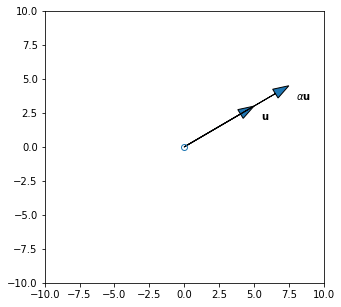

In [15]:
alpha = 1.5
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{u}$', u + (.5, -1.))
plt.arrow(0, 0, alpha * u[0], alpha * u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\alpha \mathbf{u}$', alpha * u + (.5, -1.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

What if, instead, we multiplied $\mathbf{u}$ by $\beta = -1.5$? Well,
$$\beta \mathbf{u} = -1.5 \begin{pmatrix} 5 \\ 3 \end{pmatrix} = \begin{pmatrix} -7.5 \\ -4.5 \end{pmatrix}.$$

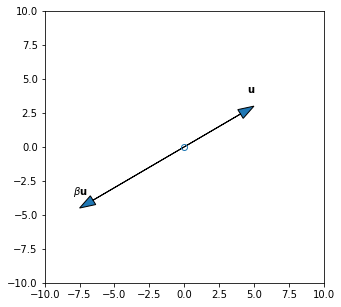

In [16]:
beta = -1.5
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{u}$', u + (-.5, 1.))
plt.arrow(0, 0, beta * u[0], beta * u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\beta \mathbf{u}$', beta * u + (-.5, 1.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

Geometrically, we have obtained a vector whose length is $1.5$ times that of $\mathbf{u}$, and whose direction is the *opposite* (because $\beta$ is negative) to that of $\mathbf{u}$.

## Vectors in Python

In Python we use the NumPy library, which we usually import with

In [17]:
import numpy as np

to represent vectors as NumPy arrays:

In [18]:
u = np.array([3., 5.])
v = np.array([4., 6.])

We can then add vectors:

In [19]:
u + v

array([  7.,  11.])

And multiply them by scalars:

In [20]:
1.5 * u

array([ 4.5,  7.5])

In [21]:
-1.5 * u

array([-4.5, -7.5])

## The length of a vector: vector norm

How do we obtain the length of a vector? By Pythagoras's theorem, we add up the coordinates and take the square root:

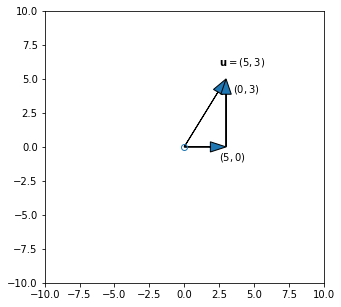

In [22]:
beta = -1.5
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{u} = (5, 3)$', u + (-.5, 1.))
plt.arrow(0, 0, u[0], 0, head_width=.75, length_includes_head=True)
plt.annotate(r'$(5, 0)$', np.array([u[0], 0]) + (-.5, -1.))
plt.arrow(u[0], 0, 0, u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$(0, 3)$', u + (.5, -1.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

The resulting quantity, which is equal to the length of the vector, is called the **norm** of the vector and is denoted by
$$\|\mathbf{u}\| = \sqrt{u_1^2 + u_2^2} = \sqrt{5^2 + 3^2} = \sqrt{34} = 5.8309518... .$$

In NumPy, we can manually compute the length of a vector...

In [23]:
u = np.array([5, 3])
u

array([5, 3])

In [24]:
np.sqrt(np.sum(u * u))

5.8309518948453007

...or use the library function `np.linalg.norm`:

In [25]:
np.linalg.norm(u)

5.8309518948453007

## The inner product, the angle between two vectors

The **inner product** or **dot product** of two vectors is the sum of products of their respective coordinates:
$$\langle \mathbf{u}, \mathbf{v} \rangle = u_1 \cdot v_1 + u_2 \cdot v_2.$$

In particular, for $\mathbf{u} = (5, 3)$ and $\mathbf{v} = (4, 6)$, it is given by
$$\langle \mathbf{u}, \mathbf{v} \rangle = 5 \cdot 4 + 3 \cdot 6 = 38.$$

We can check our calculations using Python:

In [26]:
np.dot(u, v)

38.0

Geometrically speaking, the inner product, when appropriately normalised, gives the cosine of the angle in radians between two vectors, $\theta$.

To be more precise,
$$\cos \theta = \frac{\langle \mathbf{u}, \mathbf{v} \rangle}{\| \mathbf{u} \| \| \mathbf{v} \|}.$$

Thus the angle between $\mathbf{u} = (5, 3)$ and $\mathbf{v} = (4, 6)$ is given by

In [27]:
angle = np.arccos(np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v)))
angle

0.44237422297674489

in radians, or

In [28]:
angle / np.pi * 180.

25.34617594194669

in degrees.

We can visually verify that this is indeed true:

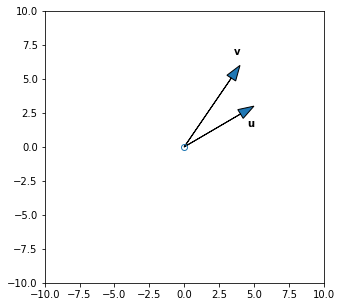

In [29]:
u = np.array([5, 3])
v = np.array([4, 6])
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .75))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

Note also that
$$\| \mathbf{u} \| = \sqrt{\langle \mathbf{u}, \mathbf{u} \rangle}.$$

Two vectors $\mathbf{u}$ and $\mathbf{v}$ are said to be **orthogonal** or perpendicular if the angle between them is 90 degrees ($\frac{\pi}{2}$ radians). Since $\cos \frac{\pi}{2} = 0$, this is equivalent to saying
$$\langle \mathbf{u}, \mathbf{v} \rangle = 0.$$

Consider, for example, $\mathbf{u}$ and $\mathbf{w} = \begin{pmatrix} 1 \\ -\frac{5}{3} \end{pmatrix}$,

In [30]:
u = np.array([5, 3])
w = np.array([1, -5./3.])

In [31]:
np.dot(u, w)

0.0

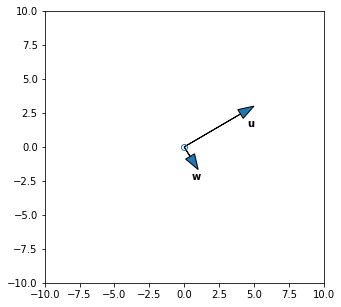

In [32]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(0, 0, w[0], w[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{w}$', w + (-.5, -.75))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

Notice that the inner product is **commutative**,
$$\langle \mathbf{u}, \mathbf{v} \rangle = \langle \mathbf{v}, \mathbf{u} \rangle.$$

Furthermore, if $\alpha$ is a scalar, then
$$\langle \alpha \mathbf{u}, \mathbf{v} \rangle = \alpha \langle \mathbf{u}, \mathbf{v} \rangle,$$
and
$$\langle \mathbf{u} + \mathbf{v}, \mathbf{w} \rangle = \langle \mathbf{u}, \mathbf{w} \rangle + \langle \mathbf{v}, \mathbf{w} \rangle;$$
these two properties together are referred to as **linearity in the first argument**.

The inner product is **positive-definite**. In other words, for all vectors $\mathbf{u}$,
$$\langle \mathbf{u}, \mathbf{u} \rangle \geq 0,$$
and
$$\langle \mathbf{u}, \mathbf{u} \rangle = 0$$
if and only if $\mathbf{u}$ is the **zero vector**, $\mathbf{0}$, i.e. the vector whose elements are all zero.

## Vectors in three dimensions

So far, we have considered vectors that have two coordinates each, corresponding to coordinates on the two-dimensional plane, $\mathbb{R}^2$. Instead, we could consider three-dimensional vectors, such as $\mathbf{a} = \begin{pmatrix} 3 \\ 5 \\ 7 \end{pmatrix}$ and $\mathbf{b} = \begin{pmatrix} 4 \\ 6 \\ 4 \end{pmatrix}$:

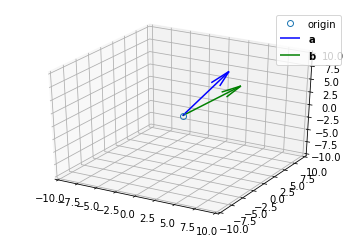

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-10, 10))
ax.quiver(0, 0, 0, 3, 5, 7, color='blue', label='$\mathbf{a}$')
ax.quiver(0, 0, 0, 4, 6, 4, color='green', label='$\mathbf{b}$')
ax.plot([0], [0], [0], 'o', markerfacecolor='none', label='origin')
ax.legend();

In the three-dimensional case, vector addition and multiplication by scalars are defined elementwise, as before:

In [34]:
a = np.array((3., 5., 7.))
b = np.array((4., 6., 4.))
a + b

array([  7.,  11.,  11.])

In [35]:
alpha

1.5

In [36]:
alpha * a

array([  4.5,   7.5,  10.5])

In [37]:
beta = -alpha
beta * a

array([ -4.5,  -7.5, -10.5])

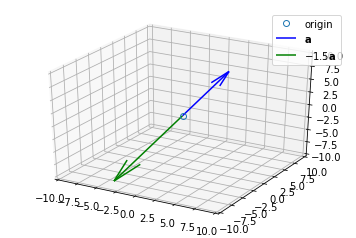

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-10, 10))
ax.quiver(0, 0, 0, a[0], a[1], a[2], color='blue', label='$\mathbf{a}$')
ax.quiver(0, 0, 0, -alpha * a[0], -alpha * a[1], -alpha * a[2], color='green', label='$-1.5 \mathbf{a}$')
ax.plot([0], [0], [0], 'o', markerfacecolor='none', label='origin')
ax.legend();

## Vectors in higher dimensions

We needn't restrict ourselves to three-dimensional vectors. We could easily define $\mathbf{c} = \begin{pmatrix} 4 \\ 7 \\ 8 \\ 2 \end{pmatrix}$ and $\mathbf{d} = \begin{pmatrix} -12 \\ 3 \\ 7 \\ 3 \end{pmatrix}$, and do arithmetics elementwise, as before:

In [39]:
c = np.array((4, 7, 8, 2))
d = np.array((-12, 3, 7, 3))
c + d

array([-8, 10, 15,  5])

In [40]:
alpha * c

array([  6. ,  10.5,  12. ,   3. ])

In data science, we usually deal with tables of observations. Such as this table:

In [41]:
import pandas as pd
df = pd.DataFrame({
    'transaction date': [2012.917, 2012.917, 2013.583, 2013.500, 2012.833],
    'house age': [32.0, 19.5, 13.3, 13.3, 5.0],
    'distance to the nearest MRT station': [84.87882, 306.59470, 561.98450, 561.98450, 390.56840],
    'number of convenience stores': [10, 9, 5, 5, 5],
    'latitude': [24.98298, 24.98034, 24.98746, 24.98746, 24.97937],
    'longitude': [121.54024, 121.53951, 121.54391, 121.54391, 121.54245],
    'house price per unit area': [37.9, 42.2, 47.3, 54.8, 43.1]
}, columns=[
    'transaction date',
    'house age',
    'distance to the nearest MRT station',
    'number of convenience stores',
    'latitude',
    'longitude',
    'house price per unit area'
])
df

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price per unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Vectors are a natural way to represent table columns. In particular, if our goal is to predict (well, explain) house price per unit area using the other columns, we define the required outputs as a vector
$$\begin{pmatrix} 37.9 \\ 42.2 \\ 47.3 \\ 54.8 \\ 43.1 \end{pmatrix}.$$

Or, in NumPy,

In [42]:
house_price = np.array([37.9, 42.2, 47.3, 54.8, 43.1])
house_price

array([ 37.9,  42.2,  47.3,  54.8,  43.1])

Thus NumPy is one of the most commonly useful Python libraries, a workhorse underlying the work of many other libraries, such as Pandas.

Machine learning algorithms, such as linear regression, can then operate on this object to give us the desired results.

We wouldn't be able to visualise four-dimensional vectors. We can nonetheless gain some geometric intuition by "pretending" that we deal with familiar two- and three-dimensional spaces.

Notice that it would only make sense to talk about adding the vectors $\mathbf{u}$ and $\mathbf{v}$ if they have the same number of elements.

In general, we talk about the **vector space** of two-dimensional vectors, $\mathbb{R}^2$, the vector space of three-dimensional vectors, $\mathbb{R}^3$, the vector space of four-dimensional vectors, $\mathbb{R}^4$, etc. and write $$\begin{pmatrix} 3 \\ 5 \\ 7 \end{pmatrix} \in \mathbb{R}^3$$ meaning that the vector $\begin{pmatrix} 3 \\ 5 \\ 7 \end{pmatrix}$ is an element of $\mathbb{R}^3$. It makes sense to talk about the addition of two vectors if they belong to the same vector space.

## Vectors in general: vector spaces

Mathematicians like abstraction. Indeed, much of the power of mathematics is in abstraction. The notions of a vector and vector space can be further generalised as follows.

Formally, a **vector space** (or **linear space**) over a [field](https://en.wikipedia.org/wiki/Field_(mathematics)) $F$ (such as real numbers, $\mathbb{R}$) is a set $V$ together with two operations that satisfy the following eight axioms, the first four axioms stipulate the properties of vector addition alone, whereas the last four involve scalar multiplication:

* **A1**: Associativity of addition: $(\mathbf{u} + \mathbf{v}) + \mathbf{w} = \mathbf{u} + (\mathbf{v} + \mathbf{w})$ for all $\mathbf{u}, \mathbf{v}, \mathbf{w} \in V$.
* **A2**: Commutativity of addition: $\mathbf{u} + \mathbf{v} = \mathbf{v} + \mathbf{u}$ for all $\mathbf{u}, \mathbf{v} \in V$.
* **A3**: **Identity** element of addition: there exists an element $\mathbf{0} \in V$, called the **zero vector**, such that $\mathbf{0} + \mathbf{v} = \mathbf{v}$ for all $\mathbf{v} \in V$.
* **A4**: **Inverse** elements of addition: for each $\mathbf{v} \in V$, there exists its **additive inverse** $-\mathbf{v} \in V$, such that $\mathbf{v} + (-\mathbf{v}) = \mathbf{0}$.
* **S1**: Distributivity of scalar multiplication over vector addition: $\alpha(\mathbf{u} + \mathbf{v}) = \alpha \mathbf{u} + \alpha \mathbf{v}$ for all $\mathbf{u}, \mathbf{v} \in V$, $\alpha \in F$.
* **S2**: Distributivity of scalar multiplication over field addition: $(\alpha + \beta)\mathbf{v} = \alpha \mathbf{v} + \beta \mathbf{v}$ for all $\alpha, \beta \in F$, $\mathbf{v} \in V$.
* **S3**: Compatibility of scalar multiplication with field multiplication: $\alpha (\beta \mathbf{v}) = (\alpha \beta) \mathbf{v}$ for all $\alpha, \beta \in F$, $\mathbf{v} \in V$.
* **S4**: **Identity** element of scalar multiplication, preservation of scale: $1 \mathbf{v} = \mathbf{v}$ for the multiplicative identity $1 \in F$, and all $\mathbf{v} \in V$.


The sets $\mathbb{R}^2$, $\mathbb{R}^3$, $\mathbb{R}^4$, are all vector spaces and the special vectors, whose elements are all zeros,
$$\begin{pmatrix} 0 \\ 0 \end{pmatrix} \in \mathbb{R}^2, \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} \in \mathbb{R}^3, \ldots$$
are their corresponding **zero vectors**.

Let us use NumPy to verify that, for example, $\mathbb{R}^3$ adheres to the above axioms:

In [43]:
u = np.array((3., 5., 7.))
v = np.array((4., 6., 4.))
w = np.array((-3., -3., 10.))

Let us check **A1** (associativity of addition):

In [44]:
(u + v) + w

array([  4.,   8.,  21.])

In [45]:
u + (v + w)

array([  4.,   8.,  21.])

In [46]:
(u + v) + w == u + (v + w)

array([ True,  True,  True], dtype=bool)

In [47]:
np.all((u + v) + w == u + (v + w))

True

Let's verify **A2** (commutativity of addition):

In [48]:
np.all(u + v == v + u)

True

Now let's **A3** (identity element of addition):

In [49]:
zero = np.zeros(3)
zero

array([ 0.,  0.,  0.])

In [50]:
np.all(zero + v == v)

True

And **A4** (inverse elements of addition):

In [51]:
np.all(np.array(v + (-v) == zero))

True

Let's confirm **S1** (distributivity of scalar multiplication over vector addition):

In [52]:
alpha = -5.
beta = 7.

In [53]:
np.all(alpha * (u + v) == alpha * u + alpha * v)

True

**S2** (distributivity of scalar multiplication over field addition):

In [54]:
np.all((alpha + beta) * v == alpha * v + beta * v)

True

**S3** (compatibility of scalar multiplication with field multiplication):

In [55]:
np.all(alpha * (beta * v) == (alpha * beta) * v)

True

Finally, let's confirm **S4** (identity element of scalar multiplication):

In [56]:
np.all(1 * v == v)

True

## The vector space of functions

There are some more unexpected vector spaces, such as the **vector space of functions**. Consider functions from real numbers to real numbers, $f: \mathbb{R} \rightarrow \mathbb{R}$, $g: \mathbb{R} \rightarrow \mathbb{R}$. We can define the sum of these functions as another function,
$$(f + g): \mathbb{R} \rightarrow \mathbb{R},$$
such that it maps its argument $x$ to the sum of $f(x)$ and $g(x)$:
$$f + g: x \mapsto f(x) + g(x).$$
We can similarly define the product of a function $f$ with a scalar $\alpha \in \mathbb{R}$:
$$\alpha f: \mathbb{R} \rightarrow \mathbb{R}, \quad \alpha f: x \mapsto \alpha f(x).$$
It is then easy to see that, functions, with addition and scalar multiplication defined in this manner, satisfy the axioms of a vector space:

In [57]:
u = lambda x: 2. * x

In [58]:
v = lambda x: x * x

In [59]:
w = lambda x: 3. * x + 1.

In [60]:
def plus(f1, f2):
    return lambda x: f1(x) + f2(x)

**A1** (associativity of addition):

In [61]:
lhs = plus(plus(u, v), w)

In [62]:
rhs = plus(u, plus(v, w))

In [63]:
lhs(5.) == rhs(5.)

True

In [64]:
lhs(10.) == rhs(10.)

True

**A2** (commutativity of addition):

In [65]:
plus(u, v)(5.) == plus(v, u)(5.)

True

**S1** (distributivity of scalar multiplication over vector addition):

In [66]:
def scalar_product(s, f):
    return lambda x: s * f(x)

In [67]:
lhs = scalar_product(alpha, plus(u, v))
rhs = plus(scalar_product(alpha, u), scalar_product(alpha, v))
lhs(5.) == rhs(5.)

True

We can verify the other axioms in a similar manner.

## Linear combinations, linear independence, span, and basis

A weighted (by scalars) sum of vectors is called a **linear combination**:
$$\alpha_1 \mathbf{v}_1 + \alpha_2 \mathbf{v}_2 + \alpha_3 \mathbf{v}_3 + \ldots + \alpha_k \mathbf{v}_k,$$
for example,
$$3.5 \begin{pmatrix} -3 \\ 3 \\ 5 \end{pmatrix} + 2.7 \begin{pmatrix} 25 \\ 7 \\ 13 \end{pmatrix} + 2.35 \begin{pmatrix} 1 \\ 1 \\ 1.5 \end{pmatrix}.$$

In [68]:
3.5 * np.array([-3., 3., 5.]) + 2.7 * np.array([25., 7., 13.]) + 2.35 * np.array([1., 1., 1.5])

array([ 59.35 ,  31.75 ,  56.125])

Vectors $\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_k$ are said to be **linearly independent** if none of them can be written as a linear combination of the remaining vectors. Thus
$$\begin{pmatrix} -3 \\ 3 \\ 5 \end{pmatrix}, \begin{pmatrix} 25 \\ 7 \\ 13 \end{pmatrix}, \begin{pmatrix} 1 \\ 1 \\ 1.5 \end{pmatrix}$$
are linearly independent, whereas
$$\begin{pmatrix} -3 \\ 3 \\ 5 \end{pmatrix}, \begin{pmatrix} 25 \\ 7 \\ 13 \end{pmatrix}, \begin{pmatrix} 34 \\ -2 \\ -2 \end{pmatrix}$$
aren't, because
$$\begin{pmatrix} 34 \\ -2 \\ -3 \end{pmatrix} = -3 \begin{pmatrix} -3 \\ 3 \\ 5 \end{pmatrix} + \begin{pmatrix} 25 \\ 7 \\ 13 \end{pmatrix}.$$

Vectors are set to **span** a particular vector space if any vector in that vector space can be written as a linear combination of those vectors.

Consider the vectors $\mathbf{u} = \begin{pmatrix} 4 \\ 6 \end{pmatrix}$ and $\mathbf{v} = \begin{pmatrix} 5 \\ 3 \end{pmatrix}$.

Can we obtain another vector, say $\mathbf{w} = \begin{pmatrix} -7 \\ 3 \end{pmatrix}$ as a linear combination of $\mathbf{u}$ and $\mathbf{v}$? In other words, can we find the scalars $x_1$ and $x_2$ such that $$x_1 \mathbf{u} + x_2 \mathbf{v} = \mathbf{w}?$$

This seems easy enough: what we really need is
$$x_1 \begin{pmatrix} 4 \\ 6 \end{pmatrix} + x_2 \begin{pmatrix} 5 \\ 3 \end{pmatrix} = \begin{pmatrix} -7 \\ 3 \end{pmatrix},$$
i.e.
$$\begin{pmatrix} 4 x_1 \\ 6 x_1 \end{pmatrix} + \begin{pmatrix} 5 x_2 \\ 3 x_2 \end{pmatrix} = \begin{pmatrix} -7 \\ 3 \end{pmatrix},$$
or
$$\begin{pmatrix} 4 x_1 + 5 x_2 \\ 6 x_1 + 3 x_2 \end{pmatrix} = \begin{pmatrix} -7 \\ 3 \end{pmatrix}.$$

The left-hand side and the right-hand side must be equal coordinatewise. Thus we obtain a system of linear equations
$$4 x_1 + 5 x_2 = -7,$$
$$6 x_1 + 3 x_2 = 3.$$

From the second linear equation, we obtain
$$x_1 = \frac{3 - 3 x_2}{6} = \frac{1 - x_2}{2}.$$
We substitute this into the first linear equation, obtaining
$$4 \cdot \frac{1 - x_2}{2} + 5 x_2 = -7,$$
whence $x_2 = -3$, and so $x_1 = \frac{1 - (-3)}{2} = 2$.

Let's check:

In [69]:
u = np.array([4, 6])
v = np.array([5, 3])
x1 = 2.; x2 = -3.
x1 * u + x2 * v

array([-7.,  3.])

We notice that there is nothing special about $\mathbf{w} = \begin{pmatrix} -7 \\ 3 \end{pmatrix}$ in the above example. We could take a general $\mathbf{b} = \begin{pmatrix} b_1 \\ b_2 \end{pmatrix}$ and find such $x_1, x_2$ that
$$x_1 \mathbf{u} + x_2 \mathbf{v} = \mathbf{b}.$$

Our linear system then becomes
$$4 x_1 + 5 x_2 = b_1,$$
$$6 x_1 + 3 x_2 = b_2.$$

From the second linear equation, we obtain $$x_1 = \frac{b_2 - 3 x_2}{6}.$$
We substitute this into the first linear equation, obtaining
$$x_2 = \frac{1}{3} b_1 - \frac{2}{9} b_2,$$
hence
$$x_1 = -\frac{1}{6} b_1 + \frac{5}{18} b_2.$$

We can check that these results are consistent with the above when $b_1 = -7$, $b_2 = 3$:

In [70]:
b = np.array([-7, 3])
x = np.array([-1./6. * b[0] + 5./18. * b[1], 1./3. * b[0] - 2./9. * b[1]])
x

array([ 2., -3.])

Indeed they are.

A set of vectors that span their vector space and are linearly independent are called a **basis** for that space.

For example, the vectors
$$\mathbf{e}_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad \mathbf{e}_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$
span the vector space $\mathbb{R}^2$. Any vector $\mathbf{b} = \begin{pmatrix} b_1 \\ b_2 \end{pmatrix}$ in $\mathbb{R}^2$ can be written as a linear combination of these vectors, namely as
$$\mathbf{b} = b_1 \mathbf{e}_1 + b_2 \mathbf{e}_2.$$

$\{\mathbf{e}_1, \mathbf{e}_2\}$ is what is known as the **standard basis** for $\mathbb{R}^2$, but there are others. We have already seen that the vectors in $\left\{\mathbf{u} = \begin{pmatrix} 4 \\ 6 \end{pmatrix}, \mathbf{v} = \begin{pmatrix} 5 \\ 3 \end{pmatrix}\right\}$ span $\mathbb{R}^2$. In fact, they are linearly independent and also form a basis of $\mathbb{R}^2$.

We have already seen that the **change of basis** from $\{\mathbf{e}_1, \mathbf{e}_2\}$ to $\{\mathbf{u}, \mathbf{v}\}$ is given by the above solution to the linear system, namely
$$\mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} -\frac{1}{6} b_1 + \frac{5}{18} b_2 \\ \frac{1}{3} b_1 - \frac{2}{9} b_2 \end{pmatrix}.$$
Thus we can rewrite
$$\mathbf{b} = b_1 \mathbf{e}_1 + b_2 \mathbf{e}_2 = x_1 \mathbf{u} + x_2 \mathbf{v}.$$

Change of basis forms the basis (no pun intended) of many statistical and machine learning techniques, such as the principal components analysis (PCA).

It can be shown that all bases (that's the plural of the word basis) for a particular vector space have the same number of elements called the **dimension** of that vector space. Thus $\mathbb{R}^2$ is two-dimensional, $\mathbb{R}^3$ is three-dimensional, etc. Whereas it can be shown that the vector space of functions, which we introduced above, is infinite-dimensional. The study of infinite-dimensional vector spaces gives rise to a separate discipline called infinite-dimensional analysis.

If you are interested in infinite-dimensional analysis, have a look at Charalambos D. Aliprantis's book *Infinite Dimensional Analysis: A Hitchhiker's Guide*: https://www.amazon.co.uk/Infinite-Dimensional-Analysis-Hitchhikers-Guide/dp/3540326960/

## Subspaces

A subset of a vector space is itself a vector space if it contains the zero vector and is closed under addition and scalar multiplication. It is then called a **subspace** of the original space.

For example, all multiples of $\mathbf{u} = \begin{pmatrix} 4 \\ 6 \end{pmatrix}$,
$$\alpha \mathbf{u}, \quad \alpha \in \mathbb{R},$$
form a one-dimensional subspace of the two dimensional vector space $\mathbb{R}^2$. (Note that the zero vector, which must be present in any vector space, is present in this subspace, since $0 \cdot \mathbf{u}$ is in it.)

C:\Programs\Win64\Anaconda\V3.6_4.3.0\lib\site-packages\ipykernel\__main__.py:24: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


NameError: name 'points2' is not defined

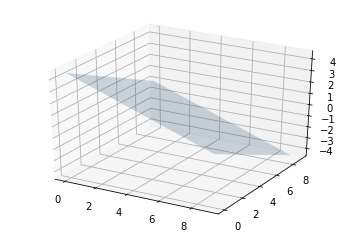

In [10]:
# plot the surface

point  = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

point2 = np.array([10, 50, 50])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.2)

# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()
ax.hold(True)

ax.scatter(points2[0], point2[1], point2[2], color='green')

## Bibliography

1. An excellent, deeper introduction to linear algebra can be found in Professor Gilbert Strang's video lectures for the *18.06 Linear Algebra* course at MIT: https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/
1. The supporting textbook for that course is *Introduction to Linear Algebra*, 5th edition, by Gilbert Strang: https://www.amazon.co.uk/Introduction-Linear-Algebra-Gilbert-Strang/dp/0980232775/
1. A more recent version of this book updated for data science and deep learning is *Linear Algebra and Learning from Data*, by Gilbert Strang, published in 2019: https://www.amazon.co.uk/Linear-Algebra-Learning-Gilbert-Strang/dp/0692196382/
1. Another good text on linear algebra is *Linear Algebra*, 3rd edition, by John B. Fraleigh and Raymond A. Beauregard: https://www.amazon.co.uk/Linear-Algebra-Third-Fraleigh-1995-01-10/dp/B01MXJ76GM/
1. One may also be recommended to read *Schaum's Outline of Linear Algebra*, 6th edition, by Seymour Lipschutz and Marc Lipson: https://www.amazon.co.uk/Schaums-Outline-Linear-Algebra-Outlines/dp/1260011445/
1. Finally, we recommend getting hold of *M2N1 &mdash; Numerical Analysis* lecture notes by Brad Baxter, which, in addition to theory, contain some useful exercises: http://www.cato.tzo.com/brad/M2N1/m2n1_notes.pdf